<a href="https://colab.research.google.com/github/PazSheimy/GoogleColab-DataScience/blob/main/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 1: Wranggling
In this lecture notebook we will we wil test the hypotesees the the CEO's of major companies are typically in their 40's or older. To do this, we will identify to companies, find their's CEO's, extract their ages, and look at look at the distribution of her age

In [1]:
#Installing some libraries that are useful to processing web data.

#For crawling page
!pip install scrapy

!pip install swifter

# # optional, for parallel execution
!pip install py_stringsimjoin

# # lxml to parse xml tree
!pip install lxml

!pip install pandas
!pip install numpy
!pip install matplotlib

     |████████████████████████████████| 256kB 8.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 3.2MB 28.3MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 3.2MB 48.1MB/s 
     |████████████████████████████████| 256kB 49.2MB/s 
     |████████████████████████████████| 3.1MB 45.8MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
  Created wheel for protego: filename=Protego-0.1.16-cp37-none-any.whl size=7783 sha256=c7419a697dfacecfb7bbfae1213c5da3988bfe64003da2340967ff313478281b
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp37-none-any.whl size=11517 sha256=781dd5b71a1fb8e8b654da03f6d41da20795b7278eac551abebcb9dc2c2fd43a
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego 

     |████████████████████████████████| 1.1MB 6.8MB/s 
     |████████████████████████████████| 665kB 22.1MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3703327 sha256=bbfa54904f9069b79162bcbfa636ea6f363402841c9c089f7d84d706c4040215
  Stored in directory: /root/.cache/pip/wheels/58/30/8e/6fa463100ff6e8595b131067ec43a118c607f621ac297e7dad
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055277 sha256=abe5c9d67b1b27b49cdb9fe040a3963a54f3fb3276dd84f5b5e03c89c2166125
  Stored in directory: /root/.cache/pip/wheels/be/8c/5d/bcdaf17d0784738b73e856ebc4061cd3f2509753a83dd71058
Successfully built py-stringsimjoin py-stringmatching


In [2]:
#here are some imports for simplicity
#For parsing dates and being able to compare
import datetime

#for fetching remote date
import urllib

#Pandas dataframe
import pandas as pd

# Numpy matrix array operations 
import numpy as np

#sqlite is a simplistic database
import sqlite3

#Crawler for multiple web pages at once
import scrapy
from scrapy.crawler import CrawlerProcess

#try to paralize the computation 
import swifter

#approximate sting matching
import py_stringsimjoin as ssj
import py_stringmatching as sm

#data visualization 
import matplotlib

#import urllib and etree for donwload and parsing
from lxml import etree

In [3]:
data = urllib.request.urlopen(\
      'https://gist.githubusercontent.com/jvilledieu/c3afe5bc21da28880a30/raw/a344034b82a11433ba6f149afa47e57567d4a18f/Companies.csv')
company_data_df = pd.read_csv(data)

In [4]:
#Persist it to an Sqlite database, and read it back.
conn = sqlite3.connect('local.db')

company_data_df.to_sql("companies",conn, if_exists="replace", index=False)
pd.read_sql_query('select * from companies', conn)


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1 750 000,acquired,USA,NY,New York City,New York,1,01/06/2012,2012-06,2012-Q2,2012.0,30/06/2012,30/06/2012
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4 000 000,operating,USA,CA,Los Angeles,Los Angeles,2,None,None,None,NaN,04/06/2010,23/09/2010
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40 000,operating,EST,None,Tallinn,Tallinn,1,26/10/2012,2012-10,2012-Q4,2012.0,09/08/2012,09/08/2012
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|iPhone|Apps|Mobile|iOS|E-Commerce|,Electronics,1 500 000,operating,GBR,None,London,London,1,01/04/2011,2011-04,2011-Q2,2011.0,01/04/2011,01/04/2011
4,/organization/n-plusn,+n (PlusN),http://plusn.com,|Software|,Software,1 200 000,operating,USA,NY,New York City,New York,2,01/01/2012,2012-01,2012-Q1,2012.0,29/08/2012,04/09/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47753,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|Android|Education|,Education,320 000,operating,GBR,None,London,London,1,28/01/2013,2013-01,2013-Q1,2013.0,24/03/2014,24/03/2014
47754,/organization/zznode-science-and-technology-co-ltd,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1 587 301,operating,CHN,None,Beijing,Beijing,1,None,None,None,NaN,01/04/2012,01/04/2012
47755,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97 398,operating,HRV,None,Split,Split,5,13/05/2012,2012-05,2012-Q2,2012.0,01/11/2011,10/09/2014
47756,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,9 300 000,operating,None,None,None,None,1,None,None,None,NaN,21/11/2011,21/11/2011


In [5]:
# Now let's read a HTML table containing information about CEOs

company_ceos_df = pd.read_html('https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/List_of_chief_executive_officers.html#List_of_CEOs')[0]

company_ceos_df


,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,Interim CEO[1],2019,"Succeeded Pierre Nanterme, Passed Away",2019-01-31
1,Aditya Birla Group,Kumar Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple Inc.,2018-10-01
3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
4,Airbus,Tom Enders,CEO[5],2012,Succeeded Louis Gallois,2017-11-14
...,...,...,...,...,...,...
180,Williams-Sonoma,Laura J. Alber,President and CEO[168],2010,Replaced W. Howard Lester,2017-11-11
181,Wipro Technologies Limited,Abidali Neemuchwala,CEO[169],2016,Previously with Tata Consultancy Services,2017-11-11
182,WWE,Vince McMahon,Chairman and CEO[170],2009,Chairman of the executive committeeChairman since 1980President and CEO from 1980-1993,2017-11-11
183,Yum! Brands,Greg Creed,CEO[171],2015,Previously CEO for Taco Bell,2017-11-11


In [6]:
crawl_list = []

for executive in company_ceos_df['Executive']:
  crawl_list.append('https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/' + executive.replace(' ', '_') + '.html')
  

crawl_list



['https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/Julie_Sweet.html',
 'https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/Kumar_Birla.html',
 'https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/Shantanu_Narayen.html',
 'https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/Garo_H._Armen.html',
 'https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/Tom_Enders.html',
 'https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autoload-data/data-wrangling/en.wikipedia.org/wiki/Daniel_Zhang.html',
 'https://raw.githubu

In [7]:
#use urllib to crawl all pages in crawl_list, and store the response of page
#in list_pages

pages =[]
for url in crawl_list:
  page = url.split("/")[-1] # extract the person name at the end of the url
  print('Looking at file %s' % page)
  # split into differernt parts, and convert the person name into ascii code
  url_list = list(urllib.parse.urlsplit(url))
  url_list[2] = urllib.parse.quote(url_list[2])
  url_ascii = urllib.parse.urlunsplit(url_list)
  try:
    response = urllib.request.urlopen((url_ascii))
    #save the page and url for later 
    pages.append(response)
  except urllib.error.URLError as e:
    print(e.reason)



Looking at file Julie_Sweet.html
Looking at file Kumar_Birla.html
Looking at file Shantanu_Narayen.html
Looking at file Garo_H._Armen.html
Looking at file Tom_Enders.html
Looking at file Daniel_Zhang.html
Looking at file Jeff_Bezos.html
Looking at file Lisa_Su.html
Looking at file Stephen_Squeri.html
Looking at file Doug_Parker.html
Looking at file Joseph_R._Swedish.html
Looking at file Tim_Cook.html
Looking at file Lakshmi_Niwas_Mittal.html
Looking at file Randall_L._Stephenson.html
Looking at file Charles_Woodburn.html
Looking at file Tapan_Singhel.html
Looking at file Carlos_Torres_Vila.html
Looking at file Brian_Moynihan.html
Looking at file Jes_Staley.html
Looking at file Warren_Buffett.html
Looking at file Hubert_Joly.html
Looking at file Sunil_Bharti_Mittal.html
Looking at file Stephen_A._Schwarzman.html
Looking at file Andrew_Mackenzie.html
Looking at file Harald_Krüger.html
Looking at file Charles_Scharf.html
Looking at file Dennis_Muilenburg.html
Looking at file Rich_Lesser.h

In [8]:
pages

 Populate a table with the name, we page URL, and birthday date of each CEO

In [9]:


 #Use etree.HTML(...) on the HTML content of each page to get a DOM tree that 
#can be processed via XPath to extract the bday information. Store the CEO name,
#Webpage, and the birthday (born) in exec_df

#We first check the HTML conteent has a table type vcard,
#abd the extract the bday information. if there is no birthday, the datatime
#value is nat (not a type)

exec_df = pd.DataFrame(columns=['name','page', 'born'])

for page in pages:

  tree = etree.HTML(page.read().decode("utf-8"))  # creating a DOM tree of the page
  url = page.geturl()
  bday = tree.xpath('//table[contains(@class,"vcard")]//tbody/tr/td//span[@class="bday"]/text()')
  if (len(bday)>0):
    exec_df = exec_df.append({'name': url[url.rfind('/')+1:-5], 'page': url,
                              'born': datetime.datetime.strptime(bday[0], '%Y-%m-%d')}, ignore_index=True)
  else:
    exec_df = exec_df.append({'name': url[url.rfind('/')+1:-5], 'page': url
                              , 'born': None}, ignore_index=True)
    
exec_df



,name,page,born
0,Julie_Sweet,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT
1,Kumar_Birla,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1967-06-14
2,Shantanu_Narayen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1963-05-27
3,Garo_H._Armen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1953-01-31
4,Tom_Enders,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT
...,...,...,...
177,Laura_J._Alber,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT
178,Abidali_Neemuchwala,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT
179,Vince_McMahon,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1945-08-24
180,Greg_Creed,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT


Cleaning and manipulating the tables


In [10]:
#Let's look at the name and born data in exec_df. we do this via projection.
#Notice also (e.g row 24) that special character will cause issues

exec_df[['name','born']]

,name,born
0,Julie_Sweet,NaT
1,Kumar_Birla,1967-06-14
2,Shantanu_Narayen,1963-05-27
3,Garo_H._Armen,1953-01-31
4,Tom_Enders,NaT
...,...,...
177,Laura_J._Alber,NaT
178,Abidali_Neemuchwala,NaT
179,Vince_McMahon,1945-08-24
180,Greg_Creed,NaT


In [11]:
#Clean the name by removing underscores, and store in a new field called clean_name
exec_df['clean_name']= exec_df['name'].apply(lambda x: x.replace('_',' '))

exec_df

,name,page,born,clean_name
0,Julie_Sweet,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Julie Sweet
1,Kumar_Birla,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1967-06-14,Kumar Birla
2,Shantanu_Narayen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1963-05-27,Shantanu Narayen
3,Garo_H._Armen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1953-01-31,Garo H. Armen
4,Tom_Enders,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Tom Enders
...,...,...,...,...
177,Laura_J._Alber,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Laura J. Alber
178,Abidali_Neemuchwala,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Abidali Neemuchwala
179,Vince_McMahon,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1945-08-24,Vince McMahon
180,Greg_Creed,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Greg Creed


In [12]:
# We can do the same via SQL. For the example we'll save the dataframe first, and then extract just the name and clean_name using SQL
exec_df.to_sql('temp_exec',conn, if_exists="replace")
pd.read_sql_query('select name, replace(name,"_"," ") as clean_name from temp_exec', conn)

,name,clean_name
0,Julie_Sweet,Julie Sweet
1,Kumar_Birla,Kumar Birla
2,Shantanu_Narayen,Shantanu Narayen
3,Garo_H._Armen,Garo H. Armen
4,Tom_Enders,Tom Enders
...,...,...
177,Laura_J._Alber,Laura J. Alber
178,Abidali_Neemuchwala,Abidali Neemuchwala
179,Vince_McMahon,Vince McMahon
180,Greg_Creed,Greg Creed


In [13]:
exec_df['clean_name']

0              Julie Sweet
1              Kumar Birla
2         Shantanu Narayen
3            Garo H. Armen
4               Tom Enders
              ...         
177         Laura J. Alber
178    Abidali Neemuchwala
179          Vince McMahon
180             Greg Creed
181        Spencer Rascoff
Name: clean_name, Length: 182, dtype: object

In [14]:
exec_df['clean_name']=='Kumar Birla'

0      False
1       True
2      False
3      False
4      False
       ...  
177    False
178    False
179    False
180    False
181    False
Name: clean_name, Length: 182, dtype: bool

In [15]:
exec_df[exec_df['clean_name']=='Kumar Birla']

,name,page,born,clean_name
1,Kumar_Birla,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1967-06-14,Kumar Birla


In [16]:
exec_df.to_sql('temp_exec', conn, if_exists='replace')
pd.read_sql_query('select * from temp_exec where clean_name = "Kumar Birla"',conn)

,index,name,page,born,clean_name
0,1,Kumar_Birla,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1967-06-14 00:00:00,Kumar Birla


Putting it together
we start with simple join companies_ceos_df and exec_df and persist it to the data.
we check how many companies did not have a match CEO name


In [17]:
merged_df = company_ceos_df[["Executive", "Company"]].merge(exec_df[["clean_name", "born"]],
                                                            left_on=["Executive"],
                                                            right_on=['clean_name'])


In [18]:
merged_df = company_ceos_df[["Executive", "Company"]].merge(exec_df[["clean_name", "born"]],
                                                            left_on=["Executive"],
                                                            right_on=['clean_name'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(merged_df['clean_name'])



0                         Julie Sweet
1                         Kumar Birla
2                    Shantanu Narayen
3                       Garo H. Armen
4                          Tom Enders
5                        Daniel Zhang
6                          Jeff Bezos
7                             Lisa Su
8                      Stephen Squeri
9                         Doug Parker
10                  Joseph R. Swedish
11                           Tim Cook
12               Lakshmi Niwas Mittal
13              Randall L. Stephenson
14                   Charles Woodburn
15                      Tapan Singhel
16                 Carlos Torres Vila
17                     Brian Moynihan
18                         Jes Staley
19                     Warren Buffett
20                        Hubert Joly
21                Sunil Bharti Mittal
22              Stephen A. Schwarzman
23                   Andrew Mackenzie
24                     Charles Scharf
25                  Dennis Muilenburg
26          

In [19]:
company_ceos_df.to_sql('company_ceos', conn, if_exists="replace")
exec_df.to_sql('executives', conn, if_exists="replace")

pd.read_sql_query('select Executive, Company, born from company_ceos ' +\
                  'join executives on Executive=clean_name', conn)


,Executive,Company,born
0,Julie Sweet,Accenture,None
1,Kumar Birla,Aditya Birla Group,1967-06-14 00:00:00
2,Shantanu Narayen,Adobe Systems,1963-05-27 00:00:00
3,Garo H. Armen,Agenus,1953-01-31 00:00:00
4,Tom Enders,Airbus,None
...,...,...,...
172,Laura J. Alber,Williams-Sonoma,None
173,Abidali Neemuchwala,Wipro Technologies Limited,None
174,Vince McMahon,WWE,1945-08-24 00:00:00
175,Greg Creed,Yum! Brands,None


Note: that the join above resulted in 177 rows and 3 columns, however there are more rows in company_ceos_df so we are missing som ecompanies. we can see which ones are missed using a left outer join .


In [20]:
leftjoin_df = company_ceos_df[['Executive', 'Company']].merge(exec_df[['clean_name', 'born']], 
                                                left_on=['Executive'], 
                                                right_on=['clean_name'], how="left", indicator=True)

leftjoin_df


,Executive,Company,clean_name,born,_merge
0,Julie Sweet,Accenture,Julie Sweet,NaT,both
1,Kumar Birla,Aditya Birla Group,Kumar Birla,1967-06-14,both
2,Shantanu Narayen,Adobe Systems,Shantanu Narayen,1963-05-27,both
3,Garo H. Armen,Agenus,Garo H. Armen,1953-01-31,both
4,Tom Enders,Airbus,Tom Enders,NaT,both
...,...,...,...,...,...
180,Laura J. Alber,Williams-Sonoma,Laura J. Alber,NaT,both
181,Abidali Neemuchwala,Wipro Technologies Limited,Abidali Neemuchwala,NaT,both
182,Vince McMahon,WWE,Vince McMahon,1945-08-24,both
183,Greg Creed,Yum! Brands,Greg Creed,NaT,both


In [21]:
#Find names  with invalid characters using with validation rules

replace_char = "Q"

failed = False
for name in exec_df['clean_name']:
  if not name.replace(' ', replace_char).\
          replace('.', replace_char).\
          replace('\'', replace_char).\
          replace('-', replace_char).isalpha():
    print("Illegal name %s"%name)
    failed = True

if failed:
  raise AssertionError('Found illegal names!')




Illegal name Harald Kr%C3%BCger
Illegal name Francisco D%27Souza
Illegal name B%C3%B6rje Ekholm
Illegal name Michael O%27Leary
Illegal name Matthias M%C3%BCller


AssertionError: ignored

In [22]:
#match the strings aproximately, via "q-grams"(sequences of n or q characters)
#using 5 grams
tok = sm.QgramTokenizer(qval=5, return_set=True)

In [23]:
company_ceos_df

,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,Interim CEO[1],2019,"Succeeded Pierre Nanterme, Passed Away",2019-01-31
1,Aditya Birla Group,Kumar Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple Inc.,2018-10-01
3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
4,Airbus,Tom Enders,CEO[5],2012,Succeeded Louis Gallois,2017-11-14
...,...,...,...,...,...,...
180,Williams-Sonoma,Laura J. Alber,President and CEO[168],2010,Replaced W. Howard Lester,2017-11-11
181,Wipro Technologies Limited,Abidali Neemuchwala,CEO[169],2016,Previously with Tata Consultancy Services,2017-11-11
182,WWE,Vince McMahon,Chairman and CEO[170],2009,Chairman of the executive committeeChairman since 1980President and CEO from 1980-1993,2017-11-11
183,Yum! Brands,Greg Creed,CEO[171],2015,Previously CEO for Taco Bell,2017-11-11


In [24]:
exec_df

,name,page,born,clean_name
0,Julie_Sweet,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Julie Sweet
1,Kumar_Birla,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1967-06-14,Kumar Birla
2,Shantanu_Narayen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1963-05-27,Shantanu Narayen
3,Garo_H._Armen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1953-01-31,Garo H. Armen
4,Tom_Enders,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Tom Enders
...,...,...,...,...
177,Laura_J._Alber,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Laura J. Alber
178,Abidali_Neemuchwala,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Abidali Neemuchwala
179,Vince_McMahon,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1945-08-24,Vince McMahon
180,Greg_Creed,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Greg Creed


In [25]:
#Similarity join 


company_ceos_df.reset_index(inplace=True)

output_pairs = ssj.jaccard_join(company_ceos_df, exec_df, 'index', 'page', 'Executive', 'clean_name', tok, 0.35, 
                                l_out_attrs=['Executive'], r_out_attrs=['clean_name'])

output_pairs


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


,_id,l_index,r_page,l_Executive,r_clean_name,_sim_score
0,0,0,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Julie Sweet,Julie Sweet,1.0
1,1,1,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Kumar Birla,Kumar Birla,1.0
2,2,2,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Shantanu Narayen,Shantanu Narayen,1.0
3,3,3,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Garo H. Armen,Garo H. Armen,1.0
4,4,4,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Tom Enders,Tom Enders,1.0
...,...,...,...,...,...,...
177,177,180,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Laura J. Alber,Laura J. Alber,1.0
178,178,181,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Abidali Neemuchwala,Abidali Neemuchwala,1.0
179,179,182,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Vince McMahon,Vince McMahon,1.0
180,180,183,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Greg Creed,Greg Creed,1.0


In [26]:
total = company_ceos_df.merge(output_pairs,left_on=['Executive'], right_on=['l_Executive']). \
merge(exec_df,left_on=['r_page'],right_on=['page'])

total


,index,Company,Executive,Title,Since,Notes,Updated,_id,l_index,r_page,l_Executive,r_clean_name,_sim_score,name,page,born,clean_name
0,0,Accenture,Julie Sweet,Interim CEO[1],2019,"Succeeded Pierre Nanterme, Passed Away",2019-01-31,0,0,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Julie Sweet,Julie Sweet,1.0,Julie_Sweet,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Julie Sweet
1,1,Aditya Birla Group,Kumar Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01,1,1,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Kumar Birla,Kumar Birla,1.0,Kumar_Birla,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1967-06-14,Kumar Birla
2,2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple Inc.,2018-10-01,2,2,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Shantanu Narayen,Shantanu Narayen,1.0,Shantanu_Narayen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1963-05-27,Shantanu Narayen
3,3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01,3,3,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Garo H. Armen,Garo H. Armen,1.0,Garo_H._Armen,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1953-01-31,Garo H. Armen
4,4,Airbus,Tom Enders,CEO[5],2012,Succeeded Louis Gallois,2017-11-14,4,4,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Tom Enders,Tom Enders,1.0,Tom_Enders,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Tom Enders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,180,Williams-Sonoma,Laura J. Alber,President and CEO[168],2010,Replaced W. Howard Lester,2017-11-11,177,180,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Laura J. Alber,Laura J. Alber,1.0,Laura_J._Alber,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Laura J. Alber
178,181,Wipro Technologies Limited,Abidali Neemuchwala,CEO[169],2016,Previously with Tata Consultancy Services,2017-11-11,178,181,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Abidali Neemuchwala,Abidali Neemuchwala,1.0,Abidali_Neemuchwala,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Abidali Neemuchwala
179,182,WWE,Vince McMahon,Chairman and CEO[170],2009,Chairman of the executive committeeChairman since 1980President and CEO from 1980-1993,2017-11-11,179,182,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Vince McMahon,Vince McMahon,1.0,Vince_McMahon,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1945-08-24,Vince McMahon
180,183,Yum! Brands,Greg Creed,CEO[171],2015,Previously CEO for Taco Bell,2017-11-11,180,183,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Greg Creed,Greg Creed,1.0,Greg_Creed,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,NaT,Greg Creed


In [27]:
# visualizing the result

%matplotlib inline

In [28]:
#Grouping

total.groupby(by='born').get_group(datetime.datetime.strptime('1945-08-24', '%Y-%m-%d'))

,index,Company,Executive,Title,Since,Notes,Updated,_id,l_index,r_page,l_Executive,r_clean_name,_sim_score,name,page,born,clean_name
179,182,WWE,Vince McMahon,Chairman and CEO[170],2009,Chairman of the executive committeeChairman since 1980President and CEO from 1980-1993,2017-11-11,179,182,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,Vince McMahon,Vince McMahon,1.0,Vince_McMahon,https://raw.githubusercontent.com/odpi/OpenDS4All/penn-processing-zgi/assets/data/scripts-autolo...,1945-08-24,Vince McMahon


In [29]:
#Let's take a look at when people are born by sorting the data by born

total[['born','Company','Executive']].sort_values('born')

,born,Company,Executive
103,1923-05-27,National Amusements,Sumner Redstone
72,1929-03-07,Henderson Land Development,Lee Shau Kee
19,1930-08-30,Berkshire Hathaway,Warren Buffett
88,1933-08-04,Las Vegas Sands,Sheldon Adelson
86,1935-11-01,Koch Industries Inc.,Charles G. Koch
...,...,...,...
176,NaT,Whole Foods Market,John Mackey
177,NaT,Williams-Sonoma,Laura J. Alber
178,NaT,Wipro Technologies Limited,Abidali Neemuchwala
180,NaT,Yum! Brands,Greg Creed


In [30]:
#counting
#how many ceos are born in the same day

birthdays = total.groupby(by='born').count()[['Executive']]
birthdays



,Executive
born,
1923-05-27,1
1929-03-07,1
1930-08-30,1
1933-08-04,1
1935-11-01,1
...,...
1972-06-10,1
1973-09-18,1
1976-11-19,1


In [31]:
# Group by dacade

bdays = total[['born']].dropna()
bdays = bdays.applymap(lambda bday: str(int(bday.year/10)*10)+'s')
exec_df[['born_decade']] = bdays


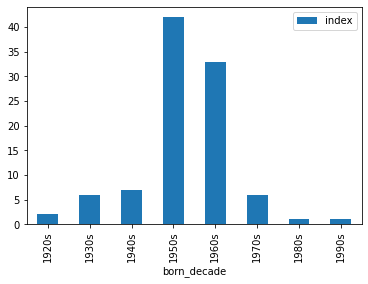

In [33]:
#plot the result

exec_df[['born_decade']].reset_index().groupby('born_decade').count().plot(kind='bar')